In [22]:
import sqlite3 as sql
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("graphs.csv")
df = df[(df["compname"] == "bzip2") & (df["ncd_formula"] == "norm-inf-dist-1") & (df["seqpart"] == 1)]
df["weight"] = 1.0 / df["dist"]
df

,lbltype,compname,ncd_formula,dist_aggregator,seqpart,seqid_1,seqid_2,dist,weight
998000,0,bzip2,norm-inf-dist-1,mp,1,97,197,0.743231,1.345477
998001,0,bzip2,norm-inf-dist-1,mp,1,197,97,0.743231,1.345477
998002,0,bzip2,norm-inf-dist-1,mp,1,97,297,0.880737,1.135413
998003,0,bzip2,norm-inf-dist-1,mp,1,297,97,0.880737,1.135413
998004,0,bzip2,norm-inf-dist-1,mp,1,97,397,0.568116,1.760204
...,...,...,...,...,...,...,...,...,...
1496989,0,bzip2,norm-inf-dist-1,mp,1,49897,49797,0.563705,1.773976
1496990,0,bzip2,norm-inf-dist-1,mp,1,49797,49997,0.703704,1.421053
1496991,0,bzip2,norm-inf-dist-1,mp,1,49997,49797,0.703704,1.421053
1496996,0,bzip2,norm-inf-dist-1,mp,1,49897,49997,0.689316,1.450713


In [31]:
lbls = pd.read_csv("labels.csv")
lbls = { row["seqid"] : row["lbl"] for index, row in lbls.iterrows() }

In [12]:
G = nx.from_pandas_edgelist(df, "seqid_1", "seqid_2", "weight")

In [37]:
node_colours = [('blue' if lbls[node] == 0 else 'red') for node in G.nodes()]
edge_opacities = list(nx.get_edge_attributes(G, "weight").values())
edge_opacities = [0.0 if a < 1.0 else 0.2 * (a - 1.0) / 3.0 for a in edge_opacities]

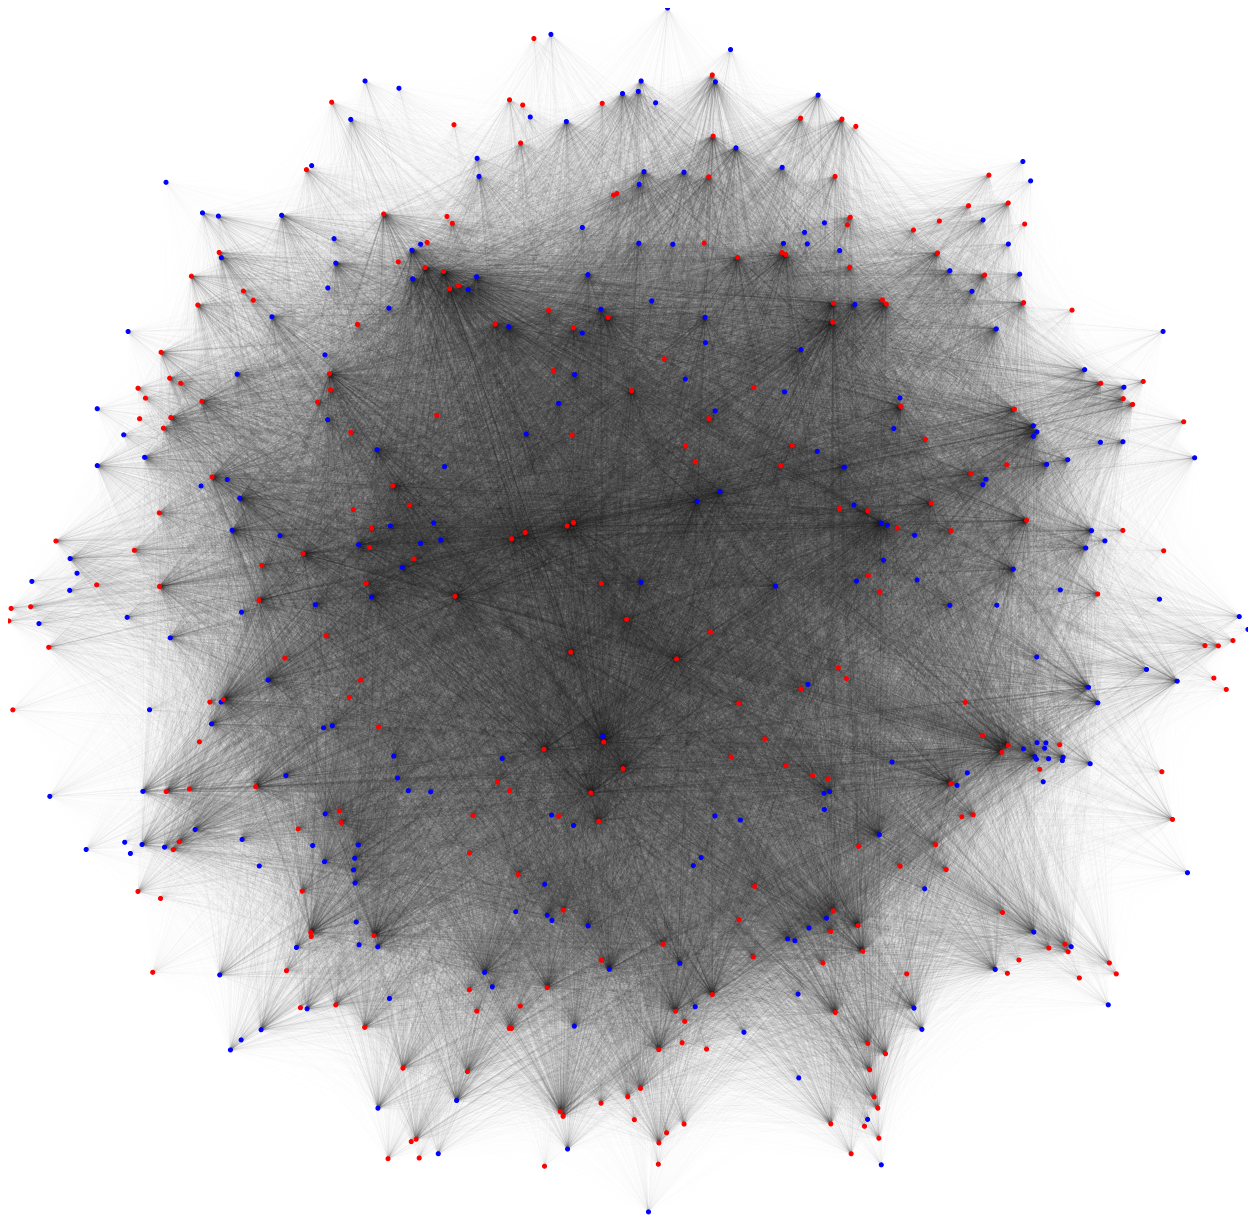

In [38]:
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G, weight="weight")
nx.draw_networkx_nodes(G, pos, node_shape='.', node_size=50, node_color=node_colours)
nx.draw_networkx_edges(G, pos, alpha=edge_opacities)
xmax = max(abs(xx) for xx, yy in pos.values())
ymax = max(abs(yy) for xx, yy in pos.values())
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.show()